In [20]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from datasets import *
from decision_tree import *
from visual_utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


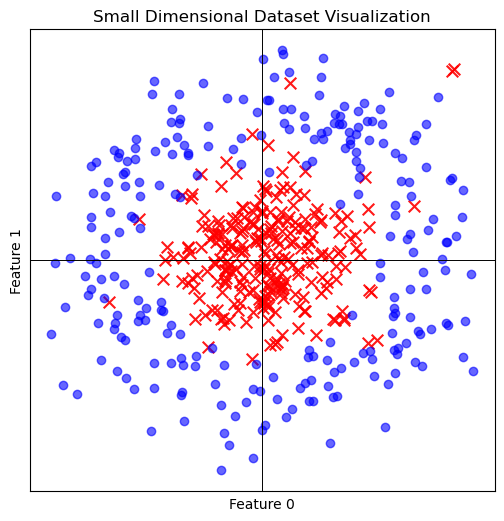

In [2]:
dataset_dict = generate_small_dataset()
visualize_small_dataset(dataset_dict["data"], dataset_dict["labels"])

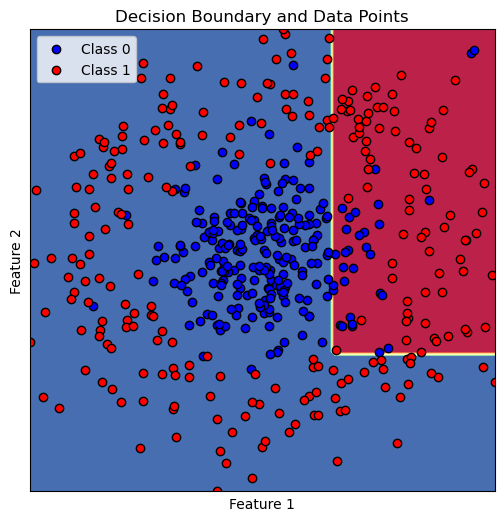

accuracy:  0.59


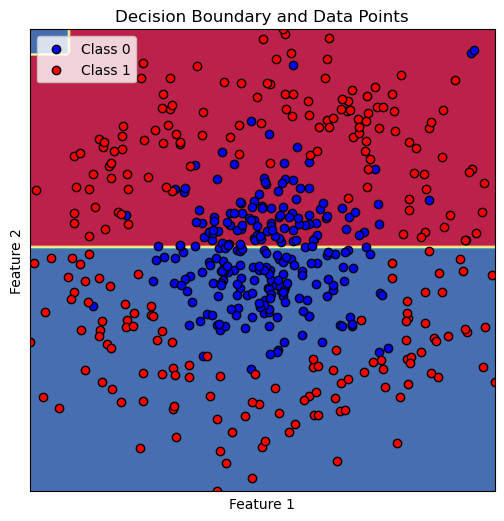

accuracy:  0.546


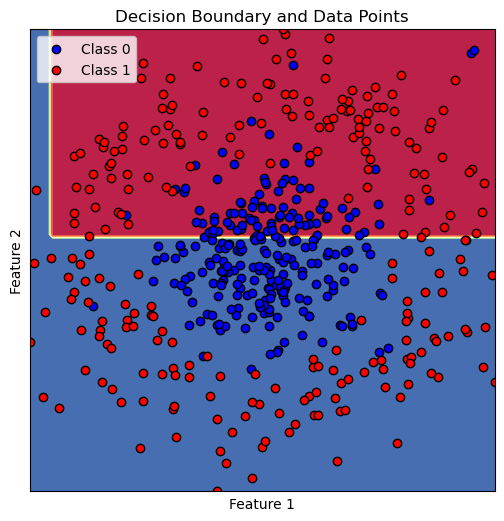

accuracy:  0.568


In [3]:
tree = Tree(
    feature_bounds=dataset_dict["feature_bounds"], generation_type="basic"
)
visualise_tree_decision( tree, dataset_dict)
print("accuracy: ",tree.calculate_accuracy(dataset_dict))

tree2 = Tree(feature_bounds=dataset_dict["feature_bounds"], generation_type="coinflip",p_add=0.5)
visualise_tree_decision( tree2, dataset_dict)
print("accuracy: ",tree2.calculate_accuracy(dataset_dict))

tree3 = Tree(feature_bounds=dataset_dict["feature_bounds"], generation_type="clever")
visualise_tree_decision(tree3, dataset_dict)
print("accuracy: ", tree3.calculate_accuracy(dataset_dict))

In [4]:
print("tree 1:")
tree.print_tree_traverse()
print("\ntree 2:")
tree2.print_tree_traverse()
print("\ntree 3:")
tree3.print_tree_traverse()

tree 1:
f: 1: 1 thr: -0.412 left: f: 1: 1 thr: 0.935 right: f: 1: -1 thr: -0.505
f: 1: 1 thr: 0.935 left: f: 1: 1 thr: -0.076 right: f: 1: 1 thr: 0.197
f: 1: 1 thr: -0.076 left: leaf: 0 right: leaf: 1
f: 1: 1 thr: 0.197 left: leaf: 0 right: leaf: 1
f: 1: -1 thr: -0.505 left: f: 1: 1 thr: -0.549 right: f: 0: -1 thr: 0.303
f: 1: 1 thr: -0.549 left: leaf: 0 right: leaf: 1
f: 0: -1 thr: 0.303 left: leaf: 0 right: leaf: 1

tree 2:
f: 1: 1 thr: -0.708 left: f: 0: -1 thr: 0.142 right: f: 1: -1 thr: 0.882
f: 0: -1 thr: 0.142 left: f: 1: 1 thr: -0.035 right: f: 1: 1 thr: -0.308
f: 1: 1 thr: -0.035 left: leaf: 0 right: leaf: 1
f: 1: 1 thr: -0.308 left: leaf: 0 right: leaf: 1
f: 1: -1 thr: 0.882 left: f: 1: -1 thr: 0.068 right: f: 0: -1 thr: -0.835
f: 1: -1 thr: 0.068 left: leaf: 0 right: leaf: 1
f: 0: -1 thr: -0.835 left: leaf: 0 right: leaf: 1

tree 3:
f: 1: 1 thr: -0.402 left: f: 1: 1 thr: 0.895 right: f: 1: 1 thr: 0.106
f: 1: 1 thr: 0.895 left: f: 1: -1 thr: 0.567 right: f: 0: -1 thr: -0.031


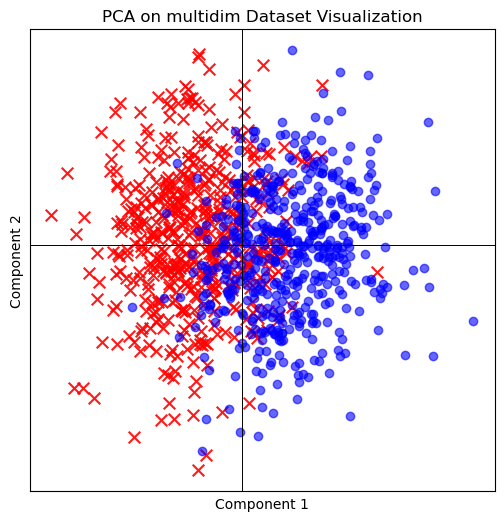

In [30]:
# dataset_dict = generate_small_dataset()
dataset_large_dict = generate_multidimensional_dataset()
visualize_multidimensional_dataset(dataset_dict["data"], dataset_dict["labels"])

In [31]:
samples = 10_000

accs = []
for i in range(samples):
    tree = Tree(
        feature_bounds=dataset_dict["feature_bounds"], generation_type="basic"
    )
    accs.append(tree.calculate_accuracy(dataset_dict))
print("basic: ", np.mean(np.array(accs)))

accs = []
for i in range(samples):
    tree = Tree(
        feature_bounds=dataset_dict["feature_bounds"], generation_type="coinflip",p_add=0.8
    )
    accs.append(tree.calculate_accuracy(dataset_dict))
print("coinflip: ", np.mean(np.array(accs)))

accs = []
for i in range(samples):
    tree = Tree(
        feature_bounds=dataset_dict["feature_bounds"], generation_type="clever"
    )
    accs.append(tree.calculate_accuracy(dataset_dict))
print("clever: ", np.mean(np.array(accs)))

basic:  0.5222504
coinflip:  0.5233052
clever:  0.5229561
